**Custom Training**

In [ ]:
!nvidia-smi


Tue Jan 21 18:32:52 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
# Pip install method

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.65 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 31.1/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/dataset

/content/drive/.shortcut-targets-by-id/1vLbYzms7VJvzgn2SWLDd2_vQQ1B1GU3y/dataset


In [ ]:
import os

dataset_path = '/content/drive/MyDrive/dataset'

In [ ]:
print("Dataset Structure:")
!ls -l {dataset_path}/train
!ls -l {dataset_path}/valid
!ls -l {dataset_path}/test | head -5

Dataset Structure:
total 8
drwx------ 2 root root 4096 Jan 21 15:00 images
drwx------ 2 root root 4096 Jan 21 15:00 labels
total 8
drwx------ 2 root root 4096 Jan 21 15:00 images
drwx------ 2 root root 4096 Jan 21 15:00 labels
total 204
-rw------- 1 root root  16550 Dec 28  2023 1.png
-rw------- 1 root root 124275 Dec 28  2023 2.png
-rw------- 1 root root  38794 Dec 28  2023 3.png
-rw------- 1 root root  27798 Dec 28  2023 4.jpg


In [ ]:
yaml_content = f'''
path: {dataset_path}
train: train/images
val: valid/images
test: test

nc: 9
names: ['upper arrow', 'down arrow', 'left arrow', 'right arrow', 'decision', 'terminal', 'print', 'input_output', 'process']
'''

In [ ]:
yaml_path = f'{dataset_path}/data.yaml'
with open(yaml_path, 'w') as f:
    f.write(yaml_content.strip())

print("\nYAML Configuration:")
!cat {yaml_path}


YAML Configuration:
path: /content/drive/MyDrive/dataset
train: train/images
val: valid/images
test: test

nc: 9
names: ['upper arrow', 'down arrow', 'left arrow', 'right arrow', 'decision', 'terminal', 'print', 'input_output', 'process']

In [ ]:
from ultralytics import YOLO

# Initialize model with transfer learning
model = YOLO('yolov8n.pt')  # Medium model for better accuracy

# Start training with augmentation
results = model.train(
    data=yaml_path,
    epochs=50,
    imgsz=640,
    batch=16,
    device=0,
    workers=2
)

Ultralytics 8.3.65 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/dataset/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=2, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True,

100%|██████████| 755k/755k [00:00<00:00, 133MB/s]


Overriding model.yaml nc=80 with nc=9

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/.shortcut-targets-by-id/1vLbYzms7VJvzgn2SWLDd2_vQQ1B1GU3y/dataset/train/labels... 621 images, 0 backgrounds, 0 corrupt: 100%|██████████| 621/621 [07:15<00:00,  1.43it/s]


train: New cache created: /content/drive/.shortcut-targets-by-id/1vLbYzms7VJvzgn2SWLDd2_vQQ1B1GU3y/dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/.shortcut-targets-by-id/1vLbYzms7VJvzgn2SWLDd2_vQQ1B1GU3y/dataset/valid/labels... 153 images, 0 backgrounds, 1 corrupt: 100%|██████████| 153/153 [01:45<00:00,  1.45it/s]

val: WARNING ⚠️ /content/drive/.shortcut-targets-by-id/1vLbYzms7VJvzgn2SWLDd2_vQQ1B1GU3y/dataset/valid/images/174_jpg.rf.4ae361e36c8c2337ab557d07a0e1229f.jpg: ignoring corrupt image/label: could not convert string to float: 'w'
val: New cache created: /content/drive/.shortcut-targets-by-id/1vLbYzms7VJvzgn2SWLDd2_vQQ1B1GU3y/dataset/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000769, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.42G     0.9703      3.326      0.982        257        640: 100%|██████████| 39/39 [00:50<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.20s/it]

                   all        152       1981      0.843      0.122      0.382      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.59G     0.9205       1.44     0.9457        282        640: 100%|██████████| 39/39 [00:49<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.62it/s]

                   all        152       1981      0.863      0.707      0.863      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.44G     0.8444       1.01     0.9289        256        640: 100%|██████████| 39/39 [00:52<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.10it/s]

                   all        152       1981      0.825      0.935      0.868      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.58G     0.8141     0.9155     0.9157        275        640: 100%|██████████| 39/39 [00:51<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.61it/s]

                   all        152       1981      0.828      0.941      0.884      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.62G     0.7719     0.8454     0.8987        331        640: 100%|██████████| 39/39 [00:58<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]

                   all        152       1981      0.876      0.965      0.895      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.68G     0.7458     0.7994      0.892        337        640: 100%|██████████| 39/39 [00:54<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.49it/s]

                   all        152       1981       0.87      0.964       0.89      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.69G     0.7147     0.7478     0.8869        330        640: 100%|██████████| 39/39 [00:53<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.08it/s]


                   all        152       1981      0.854      0.975      0.909      0.639

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.65G     0.7272     0.7296      0.886        247        640: 100%|██████████| 39/39 [00:53<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]

                   all        152       1981      0.862      0.972      0.895      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.44G     0.7099     0.6847     0.8815        244        640: 100%|██████████| 39/39 [00:56<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]

                   all        152       1981      0.862      0.975      0.889      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.43G     0.7125     0.7019     0.8773        257        640: 100%|██████████| 39/39 [00:54<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.20it/s]

                   all        152       1981      0.864      0.959      0.904      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.55G      0.706     0.6783     0.8796        199        640: 100%|██████████| 39/39 [00:52<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.21it/s]

                   all        152       1981      0.877      0.982      0.887      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.88G      0.684     0.6484     0.8763        209        640: 100%|██████████| 39/39 [00:49<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.72it/s]

                   all        152       1981      0.882       0.99      0.894      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.65G     0.6649     0.6358      0.871        312        640: 100%|██████████| 39/39 [00:54<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.72it/s]

                   all        152       1981       0.88      0.962      0.901      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       2.8G      0.696     0.6504     0.8794        228        640: 100%|██████████| 39/39 [00:50<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.11it/s]

                   all        152       1981      0.893      0.962      0.919      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.77G     0.6755     0.6121      0.872        262        640: 100%|██████████| 39/39 [00:52<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]


                   all        152       1981       0.89      0.972      0.911      0.673

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.62G     0.6839     0.6305      0.872        296        640: 100%|██████████| 39/39 [00:48<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.09it/s]


                   all        152       1981       0.87      0.972      0.919      0.667

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.72G      0.686      0.615     0.8743        243        640: 100%|██████████| 39/39 [00:52<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.03it/s]

                   all        152       1981      0.868      0.978      0.918      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.55G     0.6696     0.5929     0.8732        211        640: 100%|██████████| 39/39 [00:55<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.69it/s]

                   all        152       1981      0.906      0.962      0.936      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       2.6G     0.6356     0.5617     0.8689        229        640: 100%|██████████| 39/39 [00:59<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.06it/s]

                   all        152       1981      0.921      0.951      0.955       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.78G     0.6697     0.5897     0.8717        248        640: 100%|██████████| 39/39 [00:55<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]

                   all        152       1981      0.901      0.968      0.942      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.77G     0.6503     0.5692     0.8678        243        640: 100%|██████████| 39/39 [00:52<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.04it/s]

                   all        152       1981      0.893      0.979       0.92      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.54G     0.6515      0.561     0.8651        301        640: 100%|██████████| 39/39 [00:48<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.14it/s]

                   all        152       1981      0.909      0.956      0.954       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.46G     0.6636     0.5721     0.8658        289        640: 100%|██████████| 39/39 [00:53<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.79it/s]

                   all        152       1981      0.923      0.954      0.954      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.38G     0.6383     0.5388     0.8647        236        640: 100%|██████████| 39/39 [00:51<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.54it/s]

                   all        152       1981      0.948      0.963      0.973      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.38G     0.6642     0.5499     0.8657        279        640: 100%|██████████| 39/39 [00:54<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.92it/s]

                   all        152       1981      0.909      0.984      0.959      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.03G     0.6505     0.5391     0.8641        273        640: 100%|██████████| 39/39 [00:51<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.92it/s]

                   all        152       1981      0.965      0.976      0.984      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.62G     0.6482     0.5478     0.8606        303        640: 100%|██████████| 39/39 [00:55<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.37it/s]

                   all        152       1981      0.896      0.967       0.93      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.63G     0.6314     0.5144     0.8596        254        640: 100%|██████████| 39/39 [00:51<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.86it/s]

                   all        152       1981      0.923       0.96      0.948        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.63G     0.6478     0.5233     0.8618        239        640: 100%|██████████| 39/39 [00:51<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]

                   all        152       1981      0.913      0.961       0.95      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.69G     0.6309     0.5033     0.8614        248        640: 100%|██████████| 39/39 [00:50<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.14it/s]

                   all        152       1981      0.953      0.969      0.975      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.47G     0.6544       0.52     0.8629        264        640: 100%|██████████| 39/39 [00:59<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.11it/s]

                   all        152       1981      0.954      0.968      0.978      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.73G     0.6186     0.4973     0.8548        326        640: 100%|██████████| 39/39 [00:51<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.86it/s]

                   all        152       1981      0.926      0.963      0.953      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       2.7G     0.6363     0.4928     0.8584        268        640: 100%|██████████| 39/39 [00:53<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.74it/s]

                   all        152       1981        0.9      0.968      0.941      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.39G     0.6206     0.4805     0.8525        251        640: 100%|██████████| 39/39 [00:53<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.57it/s]

                   all        152       1981       0.97      0.973      0.984      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.34G     0.6258     0.4832     0.8541        235        640: 100%|██████████| 39/39 [00:58<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.26it/s]

                   all        152       1981      0.934      0.964      0.957      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.76G      0.631     0.4892      0.859        266        640: 100%|██████████| 39/39 [00:53<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.73it/s]

                   all        152       1981      0.969      0.968      0.976      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.45G     0.6142     0.4715     0.8576        207        640: 100%|██████████| 39/39 [00:51<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.38it/s]

                   all        152       1981       0.93      0.979      0.977      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.57G       0.62     0.4768     0.8546        246        640: 100%|██████████| 39/39 [00:53<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.87it/s]

                   all        152       1981      0.918      0.973      0.945      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.88G      0.624     0.4794     0.8566        368        640: 100%|██████████| 39/39 [00:56<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]

                   all        152       1981      0.961      0.973      0.977      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.71G     0.6141     0.4587     0.8566        288        640: 100%|██████████| 39/39 [00:52<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.47it/s]

                   all        152       1981      0.947      0.963      0.969        0.7


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.26G     0.5995     0.4736     0.8449        158        640: 100%|██████████| 39/39 [00:57<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.16it/s]

                   all        152       1981      0.937      0.966      0.963      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.24G     0.5829     0.4655     0.8405        158        640: 100%|██████████| 39/39 [00:52<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.55it/s]

                   all        152       1981      0.931      0.968      0.968      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.22G     0.5894     0.4556     0.8391        157        640: 100%|██████████| 39/39 [00:54<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]

                   all        152       1981      0.965      0.976      0.985       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.26G     0.5813     0.4378     0.8387        170        640: 100%|██████████| 39/39 [00:52<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.90it/s]

                   all        152       1981      0.967      0.962      0.982      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.22G     0.5749      0.436      0.838        160        640: 100%|██████████| 39/39 [00:54<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.81it/s]

                   all        152       1981      0.985      0.983      0.991      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.23G     0.5738     0.4267     0.8397        160        640: 100%|██████████| 39/39 [00:53<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.95it/s]

                   all        152       1981      0.912      0.963      0.943      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.27G     0.5735     0.4202       0.84        161        640: 100%|██████████| 39/39 [00:56<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.87it/s]

                   all        152       1981       0.97      0.969      0.975       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.18G     0.5748     0.4277     0.8359        147        640: 100%|██████████| 39/39 [00:51<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]

                   all        152       1981      0.955      0.965      0.966      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.24G      0.569     0.4166     0.8389        155        640: 100%|██████████| 39/39 [00:51<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.48it/s]

                   all        152       1981      0.981      0.979      0.986      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.21G     0.5705     0.4164     0.8392        196        640: 100%|██████████| 39/39 [00:50<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.22it/s]

                   all        152       1981      0.976      0.973      0.983      0.715



50 epochs completed in 0.830 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.65 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,007,403 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:10<00:00,  2.04s/it]


                   all        152       1981      0.985      0.983      0.991      0.722
           upper arrow         24        205      0.994      0.995      0.995      0.435
            down arrow         25        210      0.996          1      0.995      0.594
            left arrow         29        224      0.943      0.964      0.984      0.576
           right arrow         23        173      0.945      0.886      0.971      0.526
              decision         35        304      0.998          1      0.995      0.903
              terminal         29        226      0.998          1      0.995      0.881
                 print         28        221      0.996          1      0.995      0.886
          input_output         29        219      0.999          1      0.995      0.841
               process         28        199      0.993          1      0.995       0.86
Speed: 0.3ms preprocess, 2.6ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect

In [ ]:
!yolo task=detect mode=val model={dataset_path}/runs/detect/train/weights/best.pt data={yaml_path}

Ultralytics 8.3.65 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,007,403 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/drive/.shortcut-targets-by-id/1vLbYzms7VJvzgn2SWLDd2_vQQ1B1GU3y/dataset/valid/labels... 153 images, 0 backgrounds, 1 corrupt: 100% 153/153 [00:01<00:00, 89.91it/s] 
val: WARNING ⚠️ /content/drive/.shortcut-targets-by-id/1vLbYzms7VJvzgn2SWLDd2_vQQ1B1GU3y/dataset/valid/images/174_jpg.rf.4ae361e36c8c2337ab557d07a0e1229f.jpg: ignoring corrupt image/label: could not convert string to float: 'w'
val: New cache created: /content/drive/.shortcut-targets-by-id/1vLbYzms7VJvzgn2SWLDd2_vQQ1B1GU3y/dataset/valid/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0% 0/10 [00:00<?, ?it/s]WARNING ⚠️ NMS time limit 2.800s exceeded
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 10/10 [00:18<00:00,  1.84s/it]
             

Ultralytics 8.3.65 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,007,403 parameters, 0 gradients, 8.1 GFLOPs

image 1/4 /content/drive/MyDrive/dataset/test/1.png: 512x640 6 down arrows, 2 decisions, 2 terminals, 1 input_output, 2 processs, 34.4ms
image 2/4 /content/drive/MyDrive/dataset/test/2.png: 640x480 3 down arrows, 1 right arrow, 2 decisions, 1 terminal, 3 processs, 56.9ms
image 3/4 /content/drive/MyDrive/dataset/test/3.png: 640x640 11 down arrows, 6 right arrows, 5 decisions, 2 terminals, 9 processs, 16.2ms
image 4/4 /content/drive/MyDrive/dataset/test/4.jpg: 448x640 3 down arrows, 5 right arrows, 1 decision, 2 terminals, 2 input_outputs, 8 processs, 36.0ms
Speed: 4.2ms preprocess, 35.9ms inference, 139.1ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


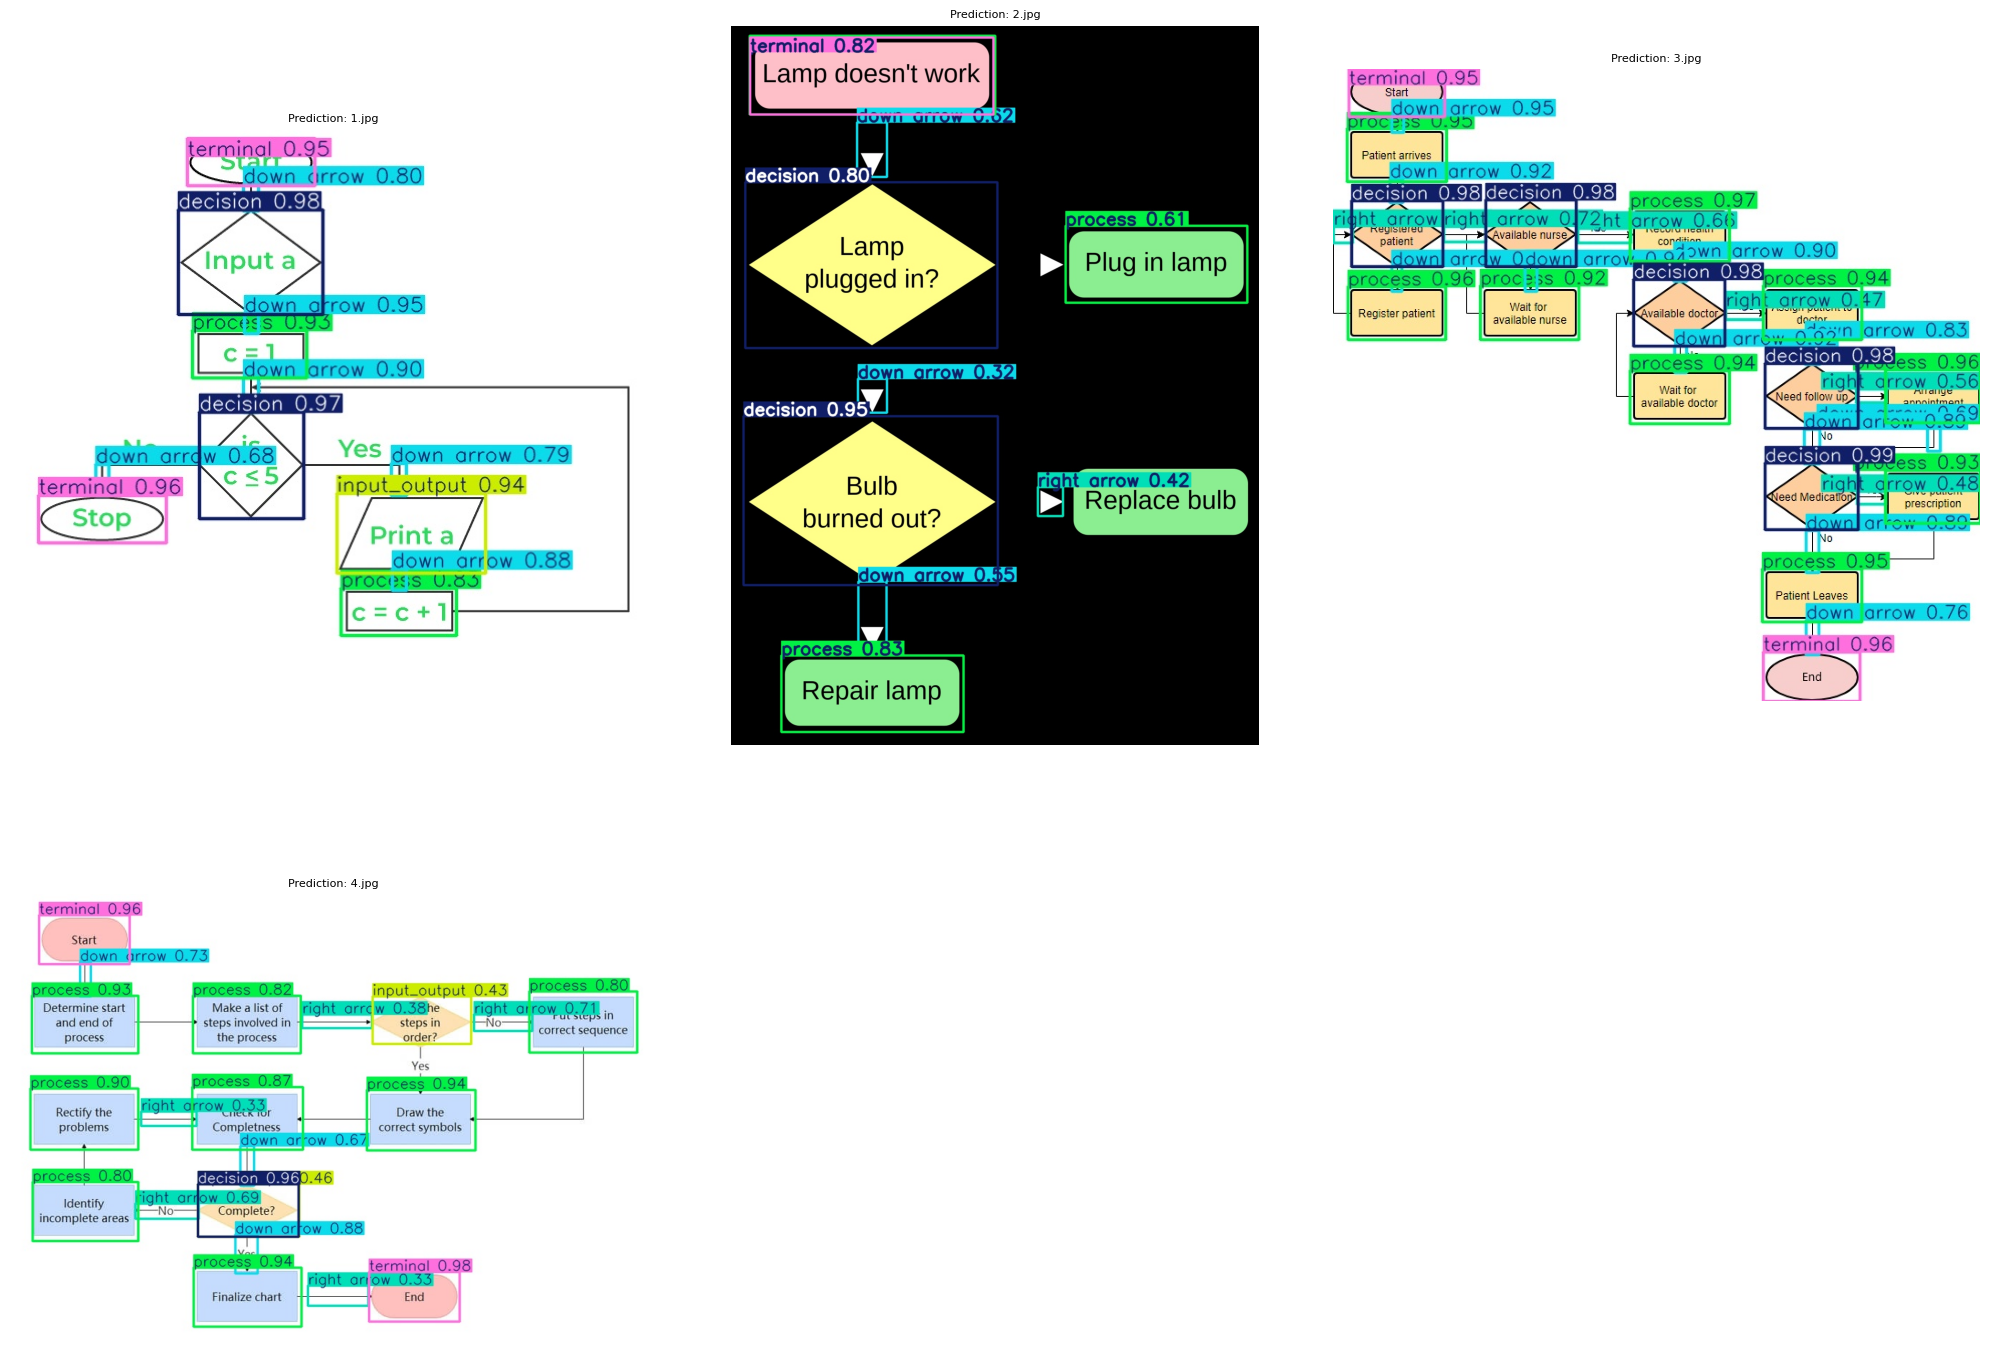

In [ ]:
# 7. Enhanced Inference & Visualization
# --------------------------
# Predict with confidence threshold
!yolo task=detect mode=predict model={dataset_path}/runs/detect/train/weights/best.pt \
conf=0.3 source={dataset_path}/test save=True

# Visualize predictions
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def visualize_results(results_dir):
    results_path = os.path.join(dataset_path, 'runs/detect/predict')
    images = [f for f in os.listdir(results_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    plt.figure(figsize=(20, 15))
    for idx, img_name in enumerate(images[:6]):  # Show first 6 results
        img_path = os.path.join(results_path, img_name)
        img = mpimg.imread(img_path)

        plt.subplot(2, 3, idx+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Prediction: {img_name}", fontsize=8)

    plt.tight_layout()
    plt.show()

visualize_results(dataset_path)

**validate custom model**